## 1 简介
本文档记录了收集、处理、分析 WeRateDogs 的推特档案数据集的过程，以及简单的探索分析结果。

## 2 收集

### 2.1 读取手头文件twitter_archive_enhanced.csv 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_tw_origin = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_tw_origin.shape

(2356, 17)

### 2.2 编程下载推特图像的预测数据
编程下载推特图像的预测数据，存储为image-predictions.tsv

In [4]:
import requests

In [5]:
img_predict_url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/数据清洗/WeRateDogs项目/image-predictions.tsv"
response = requests.get(img_predict_url)
with open('image-predictions.tsv','wb') as f:
    f.write(response.content)

In [6]:
df_tw_ip = pd.read_csv('image-predictions.tsv',sep='\t')

In [7]:
df_tw_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_tw_ip.shape

(2075, 12)

### 2.3 获取每条推特的附加数据
使用tweepy，通过api获取每条推特的附加数据

In [9]:
import json

tw_lines = []
with open('tweet_json.txt','r') as f:
    lines = f.readlines()
    for line in lines:
        tw_lines.append(json.loads(line[:-1]))

In [10]:
# 因后续分析问题只需要这些数据，所以此处只保留三列；
df_tw_more = pd.DataFrame(tw_lines, columns=['id','favorite_count','retweet_count'])
df_tw_more.columns = ['tweet_id','favorite_count','retweet_count']

In [11]:
df_tw_more.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


In [12]:
df_tw_more.shape

(2352, 3)

In [13]:
df_tw_more.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [14]:
df_tw_origin['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
df_tw_origin['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
df_tw_ip['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [17]:
df_tw_ip[df_tw_ip.img_num==4]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
1342,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,chow,0.999953,True,Tibetan_mastiff,0.000023,True,dhole,0.000003,False
1437,773985732834758656,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,4,giant_panda,0.451149,False,fur_coat,0.148001,False,pug,0.109570,True


In [18]:
df_tw_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
df_tw_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df_tw_more.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
df_tw_origin['name'].sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [22]:
pd.set_option('max_colwidth', 200)

## 评估
#### 质量问题
###### `twitter-archive-enhanced`表
1. retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp记录不为空的是转发的推特，不是我们要的数据；
2. text列含有“^RT @”的也表示转发数据，不是我们要的数据；
3. 缺失：有1976条数据没有狗的等级分类
4. 质量：timestamp：数据类型应为datetime，不是object
5. 质量：tweet_id 应为str类型，而不是int
6. 缺失：expanded_urls 有缺失
7. 质量：'rating_numerator' 有数值为几百，甚至上千的评分，可能有误识别
8. 质量：'rating_denominator' 分母固定为10，却只有2333个为10，其余的可能存在误识别的问题
9. 质量：'name' 有很多无意义的名字
    
###### `image-predictions`表
1. 缺失（Maybe）：twitter-archive-enhanced 表中有2356条推特数据，image-predictions 表中只有2075条记录，有缺失

###### `twett_json` 表
1. 质量：created_at 时间应为datetime，不是object
2. 缺失：twitter-archive-enhanced 表中有2356条推特数据，twett_json表中只有2351条记录，有缺失

#### 整洁度问题
1. 狗的等级评定不应该是4列，而是一列“狗的等级”，数据类型为“分类”：doggo、floofer、pupper、puppo
2. 三张表的内容都是有关于一条推特的，应该合并


## 清理
### 1. 备份

In [23]:
df_tw_orgin_clean = df_tw_origin.copy()
df_tw_ip_clean = df_tw_ip.copy()
df_tw_more_clean = df_tw_more.copy()

### 2. 问题处理

#### 2.1 项目要求问题
#### 定义
1. 筛选出不是转发的数据（retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp为空的）赋值给`df_tw_orgin_clean`;
2. 再删除掉这几列;

#### 编码

In [24]:
df_tw_orgin_clean = df_tw_orgin_clean[df_tw_orgin_clean.retweeted_status_id.isnull()]

In [25]:
df_tw_orgin_clean[['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']].any()

retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
dtype: bool

#### 编码
删除掉retweeted_status_timestamp、retweeted_status_id、retweeted_status_user_id

In [26]:
df_tw_orgin_clean = df_tw_orgin_clean.drop(['retweeted_status_timestamp','retweeted_status_id','retweeted_status_user_id'],axis=1)

#### 测试

In [27]:
df_tw_orgin_clean.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
901,758474966123810816,NaN,NaN,2016-07-28 01:31:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brandonald. He accidentally opened the front facing camera. Playing it off rather heckin well. 11/10 https://t.co/uPUAotqQtM,https://twitter.com/dog_rates/status/758474966123810816/photo/1,11,10,Brandonald,None,None,None,None
1479,693582294167244802,6.935722e+17,1.198989e+09,2016-01-30 23:51:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Personally I'd give him an 11/10. Not sure why you think you're qualified to rate such a stellar pup.\n@CommonWhiteGirI,NaN,11,10,None,None,None,None,None
691,787322443945877504,NaN,NaN,2016-10-15 16:01:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lincoln. He forgot to use his blinker when he changed lanes just now. Guilty as h*ck. Still 10/10 https://t.co/lsrR83SiVp,https://twitter.com/dog_rates/status/787322443945877504/photo/1,10,10,Lincoln,None,None,None,None
648,793120401413079041,NaN,NaN,2016-10-31 16:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Robin. She's desperately trying to do me a frighten, but her tongue drastically decreases her spook value. Still 11/10 great effort https://t.co/sxMrsOZ8zb",https://twitter.com/dog_rates/status/793120401413079041/photo/1,11,10,Robin,None,None,None,None
1382,700864154249383937,NaN,NaN,2016-02-20 02:06:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Pupper is a present to world. Here is a bow for pupper."" 12/10 precious as hell https://t.co/ItSsE92gCW",https://twitter.com/dog_rates/status/700864154249383937/photo/1,12,10,a,None,None,pupper,None
227,848324959059550208,NaN,NaN,2017-04-02 00:03:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Odin. He's supposed to be giving directions but he'd rather look at u like that. Should probably buckle pup. 12/10 distracting as h*ck https://t.co/1pSqUbLQ5Z,https://twitter.com/dog_rates/status/848324959059550208/photo/1,12,10,Odin,None,None,None,None


#### 2.2 整洁度问题
#### 2.2.1 合并三张表
#### 定义
1. 使用内连接将图片预测表与原始的推特记录表合并，只保留同时具有推特信息与图片信息的推特数据
2. 使用内连接将上一步合并后的数据再与附加信息表合并，只保留同时在三张表中都有数据的推特

#### 编码

In [28]:
#df_tw_orgin_clean = df_tw_orgin_clean.merge(df_tw_ip_clean, how='left', on='tweet_id')
#df_tw_orgin_clean = df_tw_orgin_clean.merge(df_tw_more_clean, how='left', left_on='tweet_id',right_on='id')
df_tweet_merged_clean = df_tw_orgin_clean.merge(df_tw_ip_clean,how='inner', on='tweet_id')

In [29]:
df_tweet_merged_clean = df_tweet_merged_clean.merge(df_tw_more_clean, how='inner', left_on='tweet_id', right_on='tweet_id')

#### 测试

In [30]:
df_tweet_merged_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1499,675781562965868544,NaN,NaN,2015-12-12 20:57:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Buddah. He was Waldo for Halloween. 11/10 https://t.co/DVAqAnb624,https://twitter.com/dog_rates/status/675781562965868544/photo/1,11,10,Buddah,...,0.921968,True,West_Highland_white_terrier,0.017811,True,toy_poodle,0.013555,True,1741,531
1856,668542336805281792,NaN,NaN,2015-11-22 21:31:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",There's a lot going on here but in my honest opinion every dog pictured is pretty fabulous. 10/10 for all. Good dogs https://t.co/VvYVbsi6c3,https://twitter.com/dog_rates/status/668542336805281792/photo/1,10,10,None,...,0.267695,True,French_bulldog,0.254050,True,Staffordshire_bullterrier,0.212381,True,492,231
1782,670040295598354432,NaN,NaN,2015-11-27 00:43:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",😂😂😂 10/10 for the dog and the owner https://t.co/5iYF0Ci0EK,https://twitter.com/dog_rates/status/670040295598354432/photo/1,10,10,None,...,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True,798,118
805,739932936087216128,NaN,NaN,2016-06-06 21:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Rorie. She's zen af. Just enjoying a treat in the sunlight. 10/10 would immediately trade lives with https://t.co/yctnFptdQ1,https://twitter.com/dog_rates/status/739932936087216128/photo/1,10,10,Rorie,...,0.243904,True,beagle,0.210975,True,vizsla,0.076443,True,4426,1211
576,773547596996571136,NaN,NaN,2016-09-07 15:44:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chelsea. She forgot how to dog. 11/10 get it together pupper https://t.co/nBJ5RE4yHb,https://twitter.com/dog_rates/status/773547596996571136/photo/1,11,10,Chelsea,...,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True,24461,7085


In [31]:
df_tweet_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1

In [32]:
df_tweet_merged_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

#### 2.2.2 处理狗狗等级的整洁度问题
#### 定义
1. 使用melt函数将`doggo`, `floofer`, `pupper`, `puppo`这几列的列名转换为“dog_stage"列的值，原本的值存入“dog_stage_name”中
2. 检查推特id是否重复，如果有重复的就将重复两行的dog_stage_name值合并，用“，”分隔
3. 清除掉`tweet_id`重复的数据

#### 编码

In [33]:
df_temp_dog_stage = pd.melt(df_tweet_merged_clean,id_vars=['tweet_id'],value_vars=['doggo','floofer','pupper','puppo'], var_name='dog_stage_type', value_name='dog_stage_name')

In [34]:
df_temp_dog_stage.head()

,tweet_id,dog_stage_type,dog_stage_name
0,892420643555336193,doggo,None
1,892177421306343426,doggo,None
2,891815181378084864,doggo,None
3,891689557279858688,doggo,None
4,891327558926688256,doggo,None


In [35]:
s_dogstage_merge = df_temp_dog_stage.groupby(by='tweet_id').apply(lambda x: ','.join(x['dog_stage_name']))

In [36]:
s_dogstage_merge.head()

tweet_id
666020888022790149    None,None,None,None
666029285002620928    None,None,None,None
666033412701032449    None,None,None,None
666044226329800704    None,None,None,None
666049248165822465    None,None,None,None
dtype: object

In [37]:
df_dogstage = pd.DataFrame(s_dogstage_merge,columns=['dog_stage'])

In [38]:
df_dogstage = df_dogstage.reset_index(level=0)

In [39]:
df_dogstage.head()

,tweet_id,dog_stage
0,666020888022790149,"None,None,None,None"
1,666029285002620928,"None,None,None,None"
2,666033412701032449,"None,None,None,None"
3,666044226329800704,"None,None,None,None"
4,666049248165822465,"None,None,None,None"


In [40]:
# 将None都处理为空字符串
df_dogstage.dog_stage = df_dogstage.dog_stage.str.replace('None,',"")
df_dogstage.dog_stage = df_dogstage.dog_stage.str.replace(',None',"")
df_dogstage.dog_stage = df_dogstage.dog_stage.str.replace('None',"")

In [41]:
df_dogstage.sample(10)

,tweet_id,dog_stage
1080,718460005985447936,
1654,817827839487737858,
213,670055038660800512,
148,668641109086707712,
1611,811744202451197953,
692,684241637099323392,
1302,753398408988139520,
72,667211855547486208,
1741,832369877331693569,
1921,875747767867523072,


In [42]:
df_tweet_merged_clean = df_tweet_merged_clean.merge(df_dogstage,how='left', on='tweet_id')

In [43]:
df_tweet_merged_clean = df_tweet_merged_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [44]:
df_tweet_merged_clean.dog_stage = df_tweet_merged_clean.dog_stage.replace('',np.nan)

#### 测试

In [45]:
df_tweet_merged_clean['dog_stage'].value_counts()

pupper           203
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

### 2.3 其它质量问题
#### 2.3.1数据类型问题
#### 定义：
使用to_datetime将timestamp的数据类型改为datetime

#### 编码

In [46]:
df_tweet_merged_clean['timestamp'] = pd.to_datetime(df_tweet_merged_clean['timestamp'])

#### 测试

In [47]:
df_tweet_merged_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### 2.3.2 质量问题：狗狗评分的分子、分母有误读
#### 定义
1. 处理多个评分：找出推文中的评分大于 1 个的数据，
    1. 只有一个合理：取合理的值，并更新到分子、分母中；
    2. 两个都合理，取第一个；
2. 处理错误识别：
    1. 找出所有分母不为 10 或者分子大于20 的行
    2. 人工识别这些推特中评分的分子（rating_numerato）分母（rating_denominator）
    - 如果是误读，则将正确的人工读取并填充到数据集中
    - 如果是多个的评分，保持原样
    - 如果是无效评分，保留原样

#### 编码

In [48]:
# 重新从推文中提取狗狗评分(提取出的分子是带有小数点的，分母为非0的10的倍数)
ratings = df_tweet_merged_clean.text.str.extract('((?:\d+\.)?\d+)\/([1-9]+[0]+)', expand = True)
# 提取的DataFrame有分子、分母两列，分别命名
ratings.columns = ['rating_numerator', 'rating_denominator']
# 用新数据替换原分子、分母数据
df_tweet_merged_clean['rating_numerator'] = ratings['rating_numerator'].astype(float)
df_tweet_merged_clean['rating_denominator'] = ratings['rating_denominator'].astype(float)

In [49]:
# 提取text中出现多个分数的情况
df_tweet_merged_clean['scores'] = df_tweet_merged_clean.text.str.findall('((?:\d+\.)?\d+\/[1-9]+[0]+)')
df_tweet_merged_clean['score_counts'] = df_tweet_merged_clean['scores'].apply(lambda x: len(set(x)))
df_tweet_merged_clean[df_tweet_merged_clean['score_counts']>1][['text','scores','score_counts','rating_numerator','rating_denominator']]

,text,scores,score_counts,rating_numerator,rating_denominator
555,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ","[12/10, 11/10]",2,12.0,10.0
749,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"[10/10, 7/10]",2,10.0,10.0
891,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,"[4/20, 13/10]",2,4.0,20.0
925,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,"[50/50, 11/10]",2,50.0,50.0
941,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,"[10/10, 8/10]",2,10.0,10.0
1062,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,"[9/10, 2/10]",2,9.0,10.0
1152,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P","[4/10, 13/10]",2,4.0,10.0
1157,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,"[10/10, 5/10]",2,10.0,10.0
1192,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,"[5/10, 10/10]",2,5.0,10.0
1207,This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf,"[10/10, 6/10]",2,10.0,10.0


In [50]:
# 选取合理的评分
df_tweet_merged_clean.loc[891,'rating_denominator'] = 10
df_tweet_merged_clean.loc[891,'rating_numerator'] = 13

df_tweet_merged_clean.loc[925,'rating_denominator'] = 10
df_tweet_merged_clean.loc[925,'rating_numerator'] = 11

df_tweet_merged_clean.loc[1152,'rating_denominator'] = 10
df_tweet_merged_clean.loc[1152,'rating_numerator'] = 13

df_tweet_merged_clean.loc[1192,'rating_denominator'] = 10
df_tweet_merged_clean.loc[1192,'rating_numerator'] = 10

df_tweet_merged_clean.loc[1550,'rating_denominator'] = 10
df_tweet_merged_clean.loc[1550,'rating_numerator'] = 8

df_tweet_merged_clean.loc[1615,'rating_denominator'] = 10
df_tweet_merged_clean.loc[1615,'rating_numerator'] = 11


In [51]:
df_tweet_merged_clean.query('rating_denominator!=10 | rating_numerator > 20')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
323,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
385,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN
662,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
726,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0
848,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
946,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
970,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
988,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1054,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1130,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0


In [52]:
# 将分母为10的n倍数的值，分子除以n

temp = df_tweet_merged_clean.copy() 

def func_for_rating(df):
    for index in df.index:
        if df.loc[index,'rating_denominator'] !=10 or df.loc[index, 'rating_numerator'] > 20:
            if df.loc[index, 'rating_denominator']%10==0:
                i = df.loc[index, 'rating_denominator']/10
                df.loc[index, 'rating_denominator'] = df.loc[index, 'rating_denominator']/i
                df.loc[index, 'rating_numerator'] = df.loc[index, 'rating_numerator']/i
    return df
df_tweet_merged_clean = func_for_rating(temp)    

In [53]:
df_tweet_merged_clean.query('rating_denominator!=10 | rating_numerator > 20')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
385,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN
726,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0
1718,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0,10.0


In [54]:
# 剩余的三条数据删除
df_tweet_merged_clean = df_tweet_merged_clean.drop(index=[385,726,1718])

#### 测试

In [55]:
df_tweet_merged_clean[(df_tweet_merged_clean.rating_denominator != 10) | (df_tweet_merged_clean.rating_numerator > 20)].loc[:,['text','rating_denominator','rating_numerator']]

,text,rating_denominator,rating_numerator


#### 2.3.3 质量问题：name无意义的问题
狗狗的姓名中有很多无意义的，明显不是狗狗名字的情况
#### 定义
1. 重新从text中提取狗狗姓名
2. 删除掉没有狗狗姓名的行
#### 编码

In [56]:
import re

In [57]:
df_tweet_merged_clean.name = df_tweet_merged_clean.text.apply(lambda x: ','.join(
    sorted(
        re.findall('(?:This is|Meet|Say hello to|THIS IS|named|name is|Here is|Here we have|found|NAME. IS.)\s([A-Z][^\s.,]*)'
                   ,x))))
df_tweet_merged_clean.loc[df_tweet_merged_clean.name == '','name'] = np.nan

#### 测试

In [58]:
df_tweet_merged_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Gerald
20       Jeffrey
21           NaN
22        Canela
23           NaN
24           NaN
25          Maya
26        Mingus
27         Derek
28        Roscoe
29       Waffles
          ...   
1964         NaN
1965         NaN
1966         NaN
1967         NaN
1968         NaN
1969         NaN
1970         NaN
1971         NaN
1972         NaN
1973         NaN
1974         NaN
1975         NaN
1976         NaN
1977         NaN
1978         NaN
1979         NaN
1980         NaN
1981         NaN
1982         NaN
1983         NaN
1984         NaN
1985         NaN
1986         NaN
1987         NaN
1988         NaN
1989         NaN
1990         NaN
1991         N

In [59]:
df_tweet_merged_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,scores,score_counts
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,0.085851,False,banana,0.076110,False,39492,8842,NaN,[13/10],1
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,...,0.090647,True,papillon,0.068957,True,33786,6480,NaN,[13/10],1
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,...,0.078253,True,kelpie,0.031379,True,25445,4301,NaN,[12/10],1
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,...,0.168086,True,spatula,0.040836,False,42863,8925,NaN,[13/10],1
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,...,0.225770,True,German_short-haired_pointer,0.175219,True,41016,9721,NaN,[12/10],1


#### 2.3.6 优化

#### 定义
1. 新增一列展示评分，分子/分母
2. 重新排列列的顺序

####  编码

In [60]:
df_tweet_merged_clean['rating'] = df_tweet_merged_clean.rating_numerator.map(str)+'/'+df_tweet_merged_clean.rating_denominator.map(str)

In [61]:
df_tweet_merged_clean = df_tweet_merged_clean[['tweet_id','text','name','rating','rating_numerator','rating_denominator','dog_stage','favorite_count','retweet_count'
                      ,'source','expanded_urls','jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'
                       ,'timestamp']]

#### 测试

In [62]:
df_tweet_merged_clean.head()

,tweet_id,text,name,rating,rating_numerator,rating_denominator,dog_stage,favorite_count,retweet_count,source,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,13.0/10.0,13.0,10.0,NaN,39492,8842,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01 16:23:56
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,13.0/10.0,13.0,10.0,NaN,33786,6480,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,12.0/10.0,12.0,10.0,NaN,25445,4301,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,13.0/10.0,13.0,10.0,NaN,42863,8925,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30 15:58:51
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,12.0/10.0,12.0,10.0,NaN,41016,9721,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24


In [63]:
df_tweet_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1991 non-null int64
text                  1991 non-null object
name                  1384 non-null object
rating                1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null float64
dog_stage             306 non-null object
favorite_count        1991 non-null int64
retweet_count         1991 non-null int64
source                1991 non-null object
expanded_urls         1991 non-null object
jpg_url               1991 non-null object
img_num               1991 non-null int64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 non-null fl

### 数据存储

In [64]:
df_tweet_merged_clean.to_csv('twitter_archive_master.csv',index=False)

#### 测试

In [65]:
df_twitter_clean = pd.read_csv('twitter_archive_master.csv')

In [66]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 23 columns):
tweet_id              1991 non-null int64
text                  1991 non-null object
name                  1384 non-null object
rating                1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null float64
dog_stage             306 non-null object
favorite_count        1991 non-null int64
retweet_count         1991 non-null int64
source                1991 non-null object
expanded_urls         1991 non-null object
jpg_url               1991 non-null object
img_num               1991 non-null int64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 non-null fl

In [67]:
df_twitter_clean.head()

,tweet_id,text,name,rating,rating_numerator,rating_denominator,dog_stage,favorite_count,retweet_count,source,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,13.0/10.0,13.0,10.0,NaN,39492,8842,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01 16:23:56
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,13.0/10.0,13.0,10.0,NaN,33786,6480,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,12.0/10.0,12.0,10.0,NaN,25445,4301,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,13.0/10.0,13.0,10.0,NaN,42863,8925,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30 15:58:51
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,12.0/10.0,12.0,10.0,NaN,41016,9721,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24


## 分析

In [68]:
df_twitter_clean.head()

,tweet_id,text,name,rating,rating_numerator,rating_denominator,dog_stage,favorite_count,retweet_count,source,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,13.0/10.0,13.0,10.0,NaN,39492,8842,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01 16:23:56
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,13.0/10.0,13.0,10.0,NaN,33786,6480,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,12.0/10.0,12.0,10.0,NaN,25445,4301,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,13.0/10.0,13.0,10.0,NaN,42863,8925,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30 15:58:51
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,12.0/10.0,12.0,10.0,NaN,41016,9721,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24


In [69]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 23 columns):
tweet_id              1991 non-null int64
text                  1991 non-null object
name                  1384 non-null object
rating                1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null float64
dog_stage             306 non-null object
favorite_count        1991 non-null int64
retweet_count         1991 non-null int64
source                1991 non-null object
expanded_urls         1991 non-null object
jpg_url               1991 non-null object
img_num               1991 non-null int64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 non-null fl

In [70]:
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])

In [71]:
# 各等级狗狗的数量
df_twitter_clean['dog_stage'].value_counts()

pupper           203
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [72]:
clean_copy = df_twitter_clean.copy()

In [73]:
clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 23 columns):
tweet_id              1991 non-null int64
text                  1991 non-null object
name                  1384 non-null object
rating                1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null float64
dog_stage             306 non-null object
favorite_count        1991 non-null int64
retweet_count         1991 non-null int64
source                1991 non-null object
expanded_urls         1991 non-null object
jpg_url               1991 non-null object
img_num               1991 non-null int64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 non-null fl

In [74]:
import matplotlib.pyplot as plt

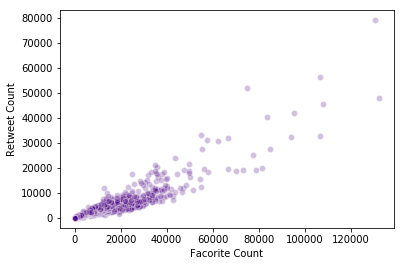

In [75]:
#转发数与点赞数的关系
plt.scatter(x=df_twitter_clean.favorite_count, y= df_twitter_clean.retweet_count, color='indigo', alpha=0.25, edgecolors='white', label='Test')
plt.xlabel('Facorite Count')
plt.ylabel('Retweet Count')
plt.show()

In [76]:
clean_copy['cat_dog_stage'] = 'others'
clean_copy.loc[clean_copy['dog_stage'] ==  'pupper', 'cat_dog_stage'] = 'pupper'
clean_copy.loc[clean_copy['dog_stage'] ==  'doggo', 'cat_dog_stage'] = 'doggo'
clean_copy.loc[clean_copy['dog_stage'] ==  'puppo', 'cat_dog_stage'] = 'puppo'

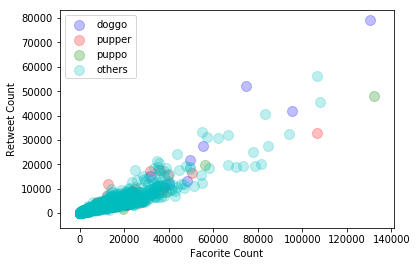

In [77]:
# 分类展示评定为不同等级宠物的推特的转发数和点赞数
def kindScatter(x,y,group,size=100,legendloc=2):
        kind = list(set(group))
        if len(kind) >7:
            print ("there is too much groups!")
        else:
            col = ['b','r','g','c','y','m','k']
            for i in range(len(kind)):
                xx = x[group==kind[i]]
                yy = y[group==kind[i]]      
                plt.scatter(xx,yy,s=size,c=col[i],
                alpha=0.25,label=kind[i])
                plt.legend(loc=legendloc,frameon=True)
                plt.xlabel('Facorite Count')
                plt.ylabel('Retweet Count')
                
kindScatter(x=clean_copy.favorite_count, y= clean_copy.retweet_count, group=clean_copy.cat_dog_stage)                

In [89]:
split = clean_copy['dog_stage'].str.split(',',expand=True).stack()
split_reset = split.reset_index(level=1,drop=True).rename('dog_stage')
df_stage = clean_copy.drop('dog_stage', axis=1).join(split_reset)
df_stage.groupby('dog_stage')[['favorite_count','retweet_count']].mean()

,favorite_count,retweet_count
dog_stage,,
doggo,18811.675676,6833.243243
floofer,13652.250000,4745.500000
pupper,7401.518868,2424.849057
puppo,22643.652174,6986.260870


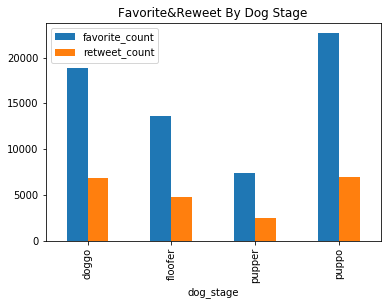

In [91]:
df_stage.groupby('dog_stage')[['favorite_count','retweet_count']].mean().plot(kind='bar',title='Favorite&Reweet By Dog Stage')

In [78]:
clean_copy.cat_dog_stage.value_counts()

others    1703
pupper     203
doggo       63
puppo       22
Name: cat_dog_stage, dtype: int64

In [79]:
clean_copy['cat_ratings'] ='--10'
clean_copy.loc[clean_copy['rating_numerator'] <10, 'cat_ratings'] = '--10'
clean_copy.loc[(clean_copy['rating_numerator'] >=10) &(clean_copy['rating_numerator'] <15), 'cat_ratings'] = '10-15'
clean_copy.loc[(clean_copy['rating_numerator'] >=15) &(clean_copy['rating_numerator'] <20), 'cat_ratings'] = '15-20'
clean_copy.loc[clean_copy['rating_numerator'] >20, 'cat_ratings'] = '20--'

In [80]:
clean_copy.cat_ratings.value_counts()

10-15    1582
--10      409
Name: cat_ratings, dtype: int64

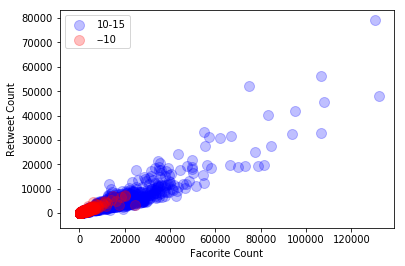

In [81]:
kindScatter(x=clean_copy.favorite_count, y= clean_copy.retweet_count, group=clean_copy.cat_ratings) 

In [82]:
clean_copy['cat_ratings2'] ='--10'
clean_copy.loc[clean_copy['rating_numerator'] <10, 'cat_ratings2'] = '--10'
clean_copy.loc[(clean_copy['rating_numerator'] >=10) &(clean_copy['rating_numerator'] <12), 'cat_ratings2'] = '10-12'
clean_copy.loc[(clean_copy['rating_numerator'] >=12) &(clean_copy['rating_numerator'] <15), 'cat_ratings2'] = '12-15'
clean_copy.loc[(clean_copy['rating_numerator'] >=15) &(clean_copy['rating_numerator'] <20), 'cat_ratings2'] = '15-20'
clean_copy.loc[clean_copy['rating_numerator'] >20, 'cat_ratings2'] = '20--'

In [83]:
clean_copy.cat_ratings2.value_counts()

10-12    828
12-15    754
--10     409
Name: cat_ratings2, dtype: int64

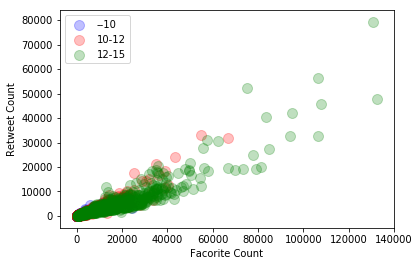

In [84]:
kindScatter(x=clean_copy.favorite_count, y= clean_copy.retweet_count, group=clean_copy.cat_ratings2) 

In [85]:
clean_copy['cat_ratings3'] ='--10'
clean_copy.loc[clean_copy['rating_numerator'] <10, 'cat_ratings2'] = '--10'
clean_copy.loc[(clean_copy['rating_numerator'] >=10) &(clean_copy['rating_numerator'] <11), 'cat_ratings3'] = '10-11'
clean_copy.loc[(clean_copy['rating_numerator'] >=11) &(clean_copy['rating_numerator'] <12), 'cat_ratings3'] = '11-12'
clean_copy.loc[(clean_copy['rating_numerator'] >=12) &(clean_copy['rating_numerator'] <13), 'cat_ratings3'] = '12-13'
clean_copy.loc[(clean_copy['rating_numerator'] >=13) &(clean_copy['rating_numerator'] <14), 'cat_ratings3'] = '13-14'
clean_copy.loc[(clean_copy['rating_numerator'] >=14) &(clean_copy['rating_numerator'] <15), 'cat_ratings3'] = '14-15'
clean_copy.loc[clean_copy['rating_numerator'] >15, 'cat_ratings3'] = '15--'

In [86]:
clean_copy.cat_ratings3.value_counts()

12-13    454
10-11    422
--10     409
11-12    406
13-14    264
14-15     36
Name: cat_ratings3, dtype: int64

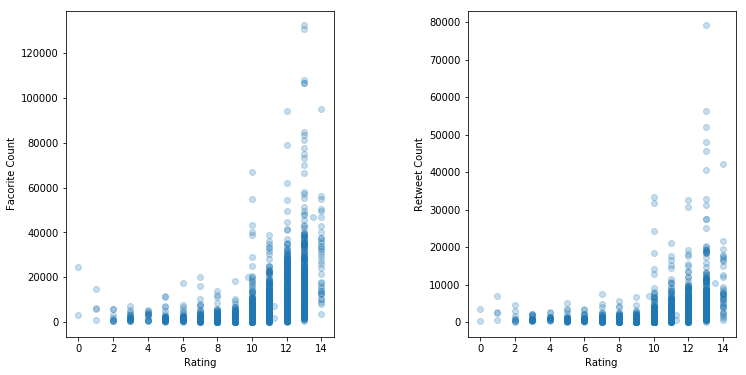

In [87]:
clean_copy_fillter = clean_copy[clean_copy.rating_numerator<15]
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(x=clean_copy_fillter.rating_numerator, y=clean_copy_fillter.favorite_count,  alpha=0.25)
plt.xlabel('Rating')
plt.ylabel('Facorite Count')
plt.subplot(122)
plt.scatter(x=clean_copy_fillter.rating_numerator, y=clean_copy_fillter.retweet_count,  alpha=0.25)
plt.xlabel('Rating')
plt.ylabel('Retweet Count')
plt.subplots_adjust(wspace =0.5)#调整子图间距
plt.show()

## 结论

本次试图寻找推特主的发文中有关狗狗的内容是否会对推特的受欢迎度产生影响（点赞与转发数）：
1. 推特的转发数和点赞数呈线性相关；
2. 给狗狗分不同的等级类别与推特的转发、点赞数量没有很明显的相关性；
3. 给狗狗进行的评分高低对推特受欢迎有影响在10-14区间范围内（该范围内每个分数的统计数量相差不大），点赞转发数情况随分数递增。